# K MEANS CLUSTERING ALGORITHM 

In [1]:
import pandas as pd                  ## import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df =pd.read_csv("DishonestInternetUsers.csv")  ## read dataset
X = df.iloc[:,0:4].values
y = df.iloc[:,-1].values
df.describe()

,COUNTING TRUST:ctrust,COUNTING UNTRUST:cuntrust,LAST TIME : last,TRANSACTION CONTEXT:context
count,322.000000,322.000000,322.000000,322.000000
mean,2.195652,1.527950,2.366460,257.453416
std,1.273592,1.105422,1.347384,128.095464
min,1.000000,1.000000,1.000000,100.000000
25%,1.000000,1.000000,1.000000,100.000000
50%,2.000000,1.000000,2.000000,200.000000
75%,4.000000,1.000000,4.000000,400.000000
max,4.000000,5.000000,4.000000,400.000000


In [2]:
m=X.shape[0]   ## data visualization
n=X.shape[1]
print(m)
print(n)

322
4


In [3]:
K=5  ## choose number of clusters K
Centroids=np.array([]).reshape(n,0) ## Initialize the centroids randomly from the data points
import random as rd
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]
    
Output={} ## initialize the output dictionary.The output of our algorithm should be a dictionary with cluster as Keys and the data points which belong to that cluster as values

EuclidianDistance=np.array([]).reshape(m,0)    ## euclidian distance from each point to all the centroids
for k in range(K):
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

Y={}                       ##Y is a temporary dictionary to store the solution for a particular iteration                                     
for k in range(K):                                        ##regroup the data points based on the cluster index C
    Y[k+1]=np.array([]).reshape(4,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)                ## Compute the mean of separated clusters and assign it as new centroids
        

        

In [9]:
n_iter=200                   ## number of iterations

## loop run for convergance 
for i in range(n_iter):
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)+1
     
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(4,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
    for k in range(K):
        Y[k+1]=Y[k+1].T
    
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y

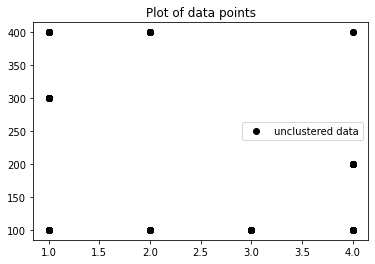

In [10]:
plt.scatter(X[:,0],X[:,3],c='black',label='unclustered data') ## oroginal data clusters

plt.legend()
plt.title('Plot of data points')  ## here the data points seem to be less than what should be depicted.It is because many points are exactly on the same spot
plt.show()

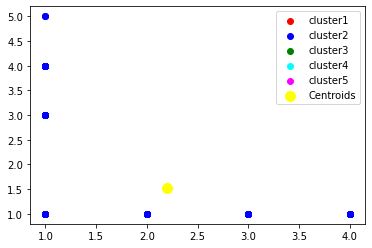

In [11]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='yellow',label='Centroids')
plt.legend()
plt.show()      ## plot after clustering